Attempting to duplicate Fig 6 from this paper: https://escholarship.org/uc/item/7341v57b

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#solids physical properties, checked
rho_s = 7.87e3 #[kg/m^3]
c_p_s = 4.82e2 #[J/kg-K]

#fluid physical properties
rho_f = 1.070 #[kg/m^3]
mu_f = 1.99e-5 #[kg/m-s]
k_f = 2.79e-2 #[W/m-K]
c_p_f = 1.006e3 #[J/kg-K]

In [3]:
#inputs
ep_bed = 0.39 #average bed porosity
k_eff = 20 #effective thermal conductivity, [W/m-K]
rho_s = 7.87e3 #solid density, [kg/m^3]
d_p = 4.76e-3 #sphere diameter, [m]
D = 6.731e-2 #tube diameter, [m]
L = 4.826e-2 #porous medium length, [m]
Re = 300

h = 150

V = np.pi*D**2/4*L

Q_dot = 10**2 / (V*(1-ep_bed)) #[W/m^3]

#geometrical calculations
S = 6 * (1 - ep_bed) / d_p #specific surface area, [1/m]
chi = 4 * ep_bed / (S * L) #hydraulic diameter to length ratio

#gas calculations
U = Re * mu_f * S / (4 * rho_f) #core superficial velocity, [m/s]
m_dot = U * rho_f #mass flux, [kg/m^2]

#dimensionless numbers
Nu = 4 * h * ep_bed / (S * k_f)
Pr = c_p_f * mu_f / k_f

#dimensionless parameters
delta_T_f = Q_dot * L * (1-ep_bed) / (m_dot * c_p_f) #characterstic temperature difference
Tau = ep_bed * L / U #characteristic time

alpha = 4 * Nu / (chi * Re * Pr)
beta = ep_bed/(1-ep_bed) * rho_f * c_p_f / (rho_s * c_p_s)
gamma = k_eff / k_f * chi / (ep_bed * Re * Pr)


In [9]:
#numerical inputs
num_slices = 20
num_steps = 500000 
final_t = 25000

#numerical integration
t = 0
dt = final_t / num_steps
dz = 1 / num_slices
ts = [t]
Ts = np.zeros((num_steps,num_slices)) # Theta_s for solids
Tg = np.zeros((num_steps,num_slices)) # Theta_g for gas

z_max = num_slices-1

#PDEs
for i in range(1,num_steps): #time iteration

    # Non-boundary
    #  solids temp
    Ts[i,1:-1] =  Ts[i-1,1:-1] + dt * (alpha * beta * (Tg[i-1,1:-1] - Ts[i-1,1:-1]) + beta + beta*gamma*(Ts[i,:-2] - 2*Ts[i,1:-1] + Ts[i,2:])/(dz**2))

    #  gas temp
    Tg[i,1:z_max] = Tg[i-1,1:z_max]+dt * ((Tg[i-1,:-2]-Tg[i-1,1:z_max])/dz+alpha * (Ts[i-1,1:z_max]-Tg[i-1,1:z_max]))

    # Boundary conditions
    Tg[i,0] == 0
    Ts[i,1]-Ts[i,0] == 0
    Ts[i,-2]-Ts[i,-1] == 0
    
    t += dt
    ts.append(t)
    


#i didn't successfully made it. what i understand is that to calculate delta_sim, \n we should use the last column of Tg minus the first column of Tg. but

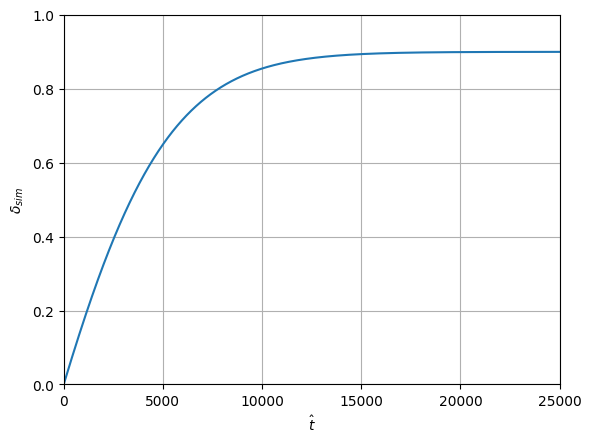

In [10]:
 
delta_sim =Tg[:,18]-Tg[:,0]
plt.plot(ts,delta_sim)
plt.xlabel("$\hat{t}$")
plt.ylabel("$\delta_{sim}$")
plt.ylim(0, 1)
plt.xlim(0, 25000)
plt.grid()